In [ ]:
import datetime as dt
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [ ]:
# Step 1: Get historical price data for assets (stocks)
start = dt.datetime(2013, 1, 1)
end = dt.datetime(2022, 10, 1)

tickers = ['AAPL', 'AMZN', 'MSFT', 'GOOGL', 'NVDA']

stocks = yf.download(tickers, start=start, end=end)['Adj Close']


[*********************100%***********************]  5 of 5 completed


In [ ]:
# Step 2: Calculate expected returns and covariance matrix
returns = stocks.pct_change().dropna()
mean_returns = returns.mean()
cov_matrix = returns.cov()

In [ ]:
# Step 3 and 4: Generate random portfolios and calculate returns and risks
num_portfolios = 10000
results = np.zeros((3, num_portfolios))
for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)

    port_return = np.sum(mean_returns * weights) * 252
    port_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))

    results[0,i] = port_return
    results[1,i] = port_stddev
    results[2,i] = port_return / port_stddev  # Sharpe ratio

In [ ]:
# Step 5: Find the optimal portfolio with the highest Sharpe ratio
max_sharpe_idx = np.argmax(results[2])
optimal_return = results[0, max_sharpe_idx]
optimal_stddev = results[1, max_sharpe_idx]


<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

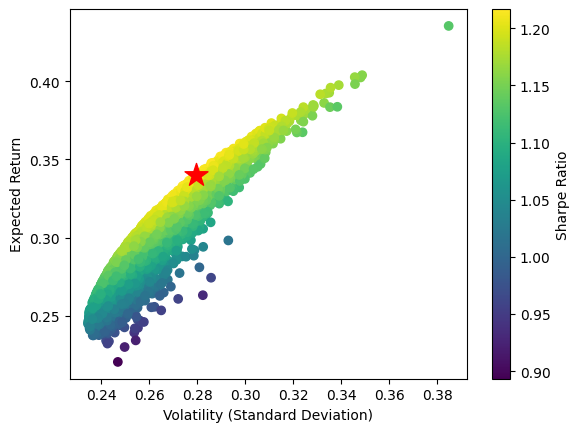

In [ ]:
# Step 6: Plot the Efficient Frontier
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(optimal_stddev, optimal_return, marker='*', color='r', s=300, label='Optimal Portfolio')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.title